In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import keras


In [22]:
import pickle

with open('/kaggle/input/cifar10-preprocessed/data.pickle', 'rb') as f:
    dest_object_name = pickle.load(f)

In [23]:
dest_object_name.keys()

dict_keys(['x_train', 'y_train', 'y_test', 'x_validation', 'x_test', 'y_validation'])

In [24]:
train_images = dest_object_name['x_train']
train_images.shape

(49000, 3, 32, 32)

In [25]:
train_labels = dest_object_name['y_train']
test_images = dest_object_name['x_test']
test_labels = dest_object_name['y_test']

In [26]:
train_images.shape

(49000, 3, 32, 32)

In [27]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [29]:
len(labels)

10

In [30]:
img = train_images[0]

In [31]:
img.shape

(3, 32, 32)

In [32]:
train_labels[0]

6

In [33]:
labels[6]

'frog'

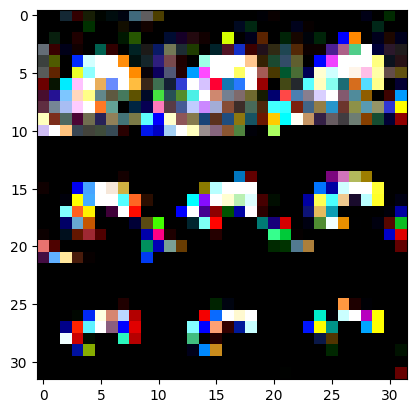

In [35]:
plt.imshow(img.reshape(32,32,3))

In [ ]:
plt.imshow(train_images[6])

In [ ]:
train_labels[6]

In [ ]:
labels[2]

In [ ]:
plt.imshow(train_images[97])

In [ ]:
train_labels[97]

In [ ]:
j = 0
for i in train_labels:

  if i == 10:
    print(i,' - ', j)
    break
  j += 1


In [ ]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(labels[int(train_labels[i])])
  plt.imshow(train_images[i])

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [ ]:
train_ds

In [ ]:
def process_image(image, label):
  image = tf.image.per_image_standardization(image)
  image = tf.image.resize(image,(64,64))
  return image,label

In [ ]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:', train_ds_size)
print('Test size:', test_ds_size)

In [ ]:
train_ds = (train_ds.map(process_image).shuffle(buffer_size=train_ds_size).batch(batch_size = 32,drop_remainder=True))

test_ds = (test_ds.map(process_image).shuffle(buffer_size=test_ds_size).batch(batch_size = 32,drop_remainder=True))

In [ ]:
train_ds

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 128, kernel_size = (11,11),strides = (4,4), activation = 'relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters = 256, kernel_size = (5,5),strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters = 256, kernel_size = (3,3),strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 256, kernel_size = (1,1),strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 256, kernel_size = (1,1),strides = (1,1), activation = 'relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
    ])

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.optimizers.SGD(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 30, validation_data = test_ds)